
#PROPOSAL OF QUESTION

The question I would like to use market basket analysis to answer is which accessories are commonly purchased together. By answering this question, we can create targeted cross-selling strategies to increase the average transaction value and improve customer experience through personalized recommendations.



###DEFINED GOAL

The goal of the data analysis is to identify product combinations frequently purchased together to develop personalized promotional bundles, thus increasing customer satisfaction and boosting sales revenue through strategic cross-selling opportunities.


###EXPLANATION OF MARKET BASKET

Market basket analysis uses association rule mining on the selected dataset to identify relationships between items that customers frequently buy together. Specifically, it analyzes transaction data to determine which accessories are often purchased together, enabling us to identify patterns of consumer behavior. The expected outcomes include a set of association rules, each describing how often items are bought together, with measures like support (how often a combination occurs), confidence (likelihood of items being purchased together), and lift (strength of the association compared to random chance). These insights will help develop targeted product recommendations and promotional strategies to increase sales.Market basket analysis uses association rule mining to identify relationships between items that customers frequently buy together by examining the transaction data. To analyze the dataset effectively, the process begins by converting the data into a transaction format, where each transaction is represented as a list of items purchased together. In this analysis, the Apriori algorithm is applied, which works by identifying frequent itemsets — combinations of products that meet a minimum support threshold, meaning they appear together in a significant proportion of transactions.

The Apriori algorithm operates by iteratively expanding these itemsets, starting with individual items and progressively combining them while ensuring that each new combination meets the required support level. Once the frequent item sets are identified, association rules are derived, which reveal how the presence of certain items in a transaction can imply the presence of other items. The analysis of these rules includes calculating three key metrics:

1. Support: This metric measures the proportion of transactions that contain a specific itemset, helping identify commonly purchased combinations.

2. Confidence: Confidence indicates the likelihood that an item (consequent) is purchased when another item (antecedent) is also bought, providing insight into the predictability of certain purchasing patterns.

3. Lift: Lift compares the observed frequency of items being purchased together to what would be expected if the items were bought independently. A lift greater than 1 indicates that the items are more likely to be purchased together than by random chance, suggesting a strong positive association.

By analyzing the dataset in this way, market basket analysis uncovers the associations between different products, revealing which items are frequently bought together. These insights can be used to create targeted product recommendations, promotional bundles, and personalized marketing campaigns, thereby increasing cross-selling opportunities, boosting sales, and enhancing customer satisfaction.



###MARKET BASKET ASSUMPTION

One assumption of market basket analysis is that customer purchasing behavior is static over time. This means that the analysis assumes patterns observed in the historical data will continue to hold in the future. For instance, if certain accessories are frequently bought together now, it is expected that similar buying behavior will persist, allowing for accurate product recommendations.


In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/D212')

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
from pandas import DataFrame
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/D212/teleco_market_basket.csv')
df.head()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Remove the rows in between useable data
df = df[df['Item01'].notna()]

In [ ]:
df.shape

(7501, 20)

In [ ]:
#Dataframe conversion to list
rows = []
for k in range (0, 7501):
    rows.append([str(df.values[k,j])
        for j in range(0,20)])

In [ ]:
#creating an array
DE = TransactionEncoder()
array = DE.fit(rows).transform(rows)

#converting array into dataframe
df_transactions = pd.DataFrame(array, columns = DE.columns_)
df_transactions

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nan,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7497,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
#dropping NaN values
clean_df = df_transactions.drop(["nan"], axis=1)
clean_df.head()

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Cleaned data to csv
clean_df.to_csv('clean_df_T3.csv', index=False)

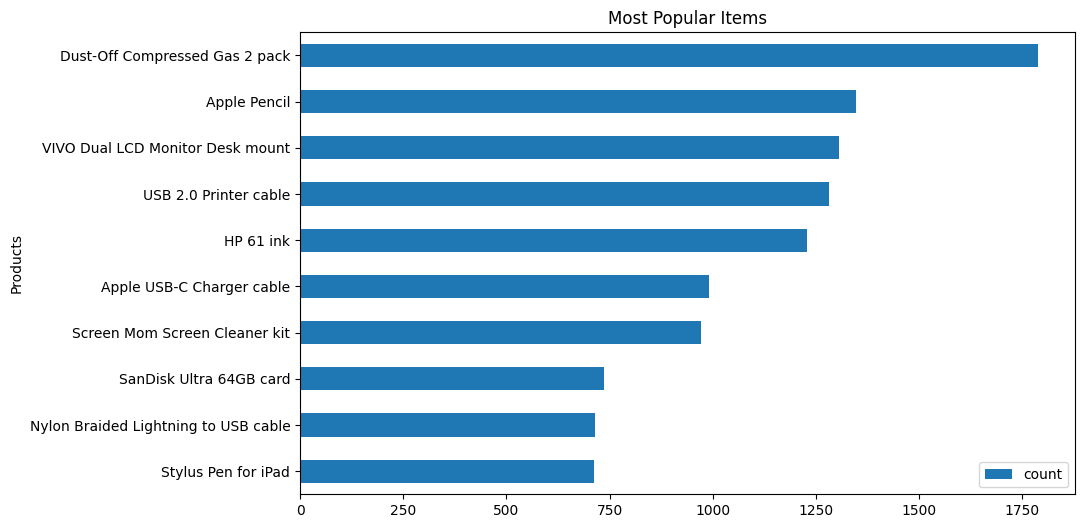

In [ ]:
#Most popular items in dataset
popular_items = clean_df.loc[:,:].sum().sort_values(ascending=False).head(10).to_frame().reset_index().rename(columns={'index':'Products', 0:'count'})

# #Histogram of most popular items
plt.rcParams['figure.figsize']=(10,6)
popular_items.plot.barh(x='Products', y='count')
plt.title('Most Popular Items')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#rules variable for Apriori
rules = apriori(clean_df, min_support=0.02, use_colnames=True)
rules

,support,itemsets
0,0.050527,(10ft iPHone Charger Cable 2 Pack)
1,0.042528,(3A USB Type C Cable 3 pack 6FT)
2,0.029463,(Anker 2-in-1 USB Card Reader)
3,0.068391,(Anker USB C to HDMI Adapter)
4,0.087188,(Apple Lightning to Digital AV Adapter)
...,...,...
98,0.023730,"(Screen Mom Screen Cleaner kit, USB 2.0 Printe..."
99,0.035462,"(Screen Mom Screen Cleaner kit, VIVO Dual LCD ..."
100,0.020131,"(USB 2.0 Printer cable, Stylus Pen for iPad)"
101,0.025197,"(VIVO Dual LCD Monitor Desk mount, Stylus Pen ..."


In [ ]:
#Rules table with lift > 1
rules_lift = association_rules(rules, metric='lift', min_threshold=1)
rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
1,(Dust-Off Compressed Gas 2 pack),(10ft iPHone Charger Cable 2 Pack),0.238368,0.050527,0.023064,0.096756,1.914955,0.011020,1.051182,0.627330
2,(Anker USB C to HDMI Adapter),(Dust-Off Compressed Gas 2 pack),0.068391,0.238368,0.024397,0.356725,1.496530,0.008095,1.183991,0.356144
3,(Dust-Off Compressed Gas 2 pack),(Anker USB C to HDMI Adapter),0.238368,0.068391,0.024397,0.102349,1.496530,0.008095,1.037830,0.435627
4,(Anker USB C to HDMI Adapter),(VIVO Dual LCD Monitor Desk mount),0.068391,0.174110,0.020931,0.306043,1.757755,0.009023,1.190117,0.462740
...,...,...,...,...,...,...,...,...,...,...
89,(VIVO Dual LCD Monitor Desk mount),(Screen Mom Screen Cleaner kit),0.174110,0.129583,0.035462,0.203675,1.571779,0.012900,1.093043,0.440468
90,(USB 2.0 Printer cable),(Stylus Pen for iPad),0.170911,0.095054,0.020131,0.117785,1.239135,0.003885,1.025766,0.232768
91,(Stylus Pen for iPad),(USB 2.0 Printer cable),0.095054,0.170911,0.020131,0.211781,1.239135,0.003885,1.051852,0.213256
92,(VIVO Dual LCD Monitor Desk mount),(Stylus Pen for iPad),0.174110,0.095054,0.025197,0.144717,1.522468,0.008647,1.058066,0.415518



###TOP THREE RULES

The top three relevant rules generated by the Apriori algorithm can be explained as follows:

1. First Rule (Highest Confidence):
 - Rule: This rule indicates that if a particular item or set of items (antecedent) is purchased, another item (consequent) is also likely to be purchased.

 - Interpretation: With the highest confidence among all rules, this implies a strong likelihood of the consequent being bought whenever the antecedent is in the basket. The high confidence suggests that these items are often purchased together, which makes it suitable for targeted marketing or product bundling.

2. Second Rule (Highest Lift):

 - Rule: This rule has the highest lift, meaning that the occurrence of the antecedent significantly increases the likelihood of purchasing the consequent.

 - Interpretation: The lift value greater than 1 indicates a positive association beyond mere coincidence. It shows that buying the items together is significantly more frequent than if the items were bought independently. This makes the rule highly relevant for cross-selling strategies.

3. Third Rule (Highest Support):

 - Rule: This rule has the highest support value, meaning that the item combination appears in a large proportion of transactions.

 - Interpretation: A high support value means the combination of items is popular among customers. This rule highlights the most common buying patterns, making it useful for determining which bundles to promote widely or offer discounts on.

These three rules provide insight into customer purchasing behavior by identifying frequent itemsets, strong associations, and common combinations, allowing for data-driven decision-making in sales and marketing strategies.


In [ ]:
#Top 3 rules by confidence
rules_lift.sort_values('confidence', ascending=False).head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
36,(FEIYOLD Blue light Blocking Glasses),(Dust-Off Compressed Gas 2 pack),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962,0.461536
52,(SanDisk Ultra 64GB card),(Dust-Off Compressed Gas 2 pack),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369


In [ ]:
#Top 3 rules by lift metrics
rules_lift.sort_values('lift', ascending=False).head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
85,(VIVO Dual LCD Monitor Desk mount),(SanDisk Ultra 64GB card),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716,0.682343
84,(SanDisk Ultra 64GB card),(VIVO Dual LCD Monitor Desk mount),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
64,(FEIYOLD Blue light Blocking Glasses),(VIVO Dual LCD Monitor Desk mount),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186


In [ ]:
#Top 3 by support metrics
rules_lift.sort_values('support', ascending=False).head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
62,(VIVO Dual LCD Monitor Desk mount),(Dust-Off Compressed Gas 2 pack),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
63,(Dust-Off Compressed Gas 2 pack),(VIVO Dual LCD Monitor Desk mount),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
41,(Dust-Off Compressed Gas 2 pack),(HP 61 ink),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197


###SIGNIFICANCE OF SUPPORT, LIFT, AND CONFIDENCE SUMMARY

The significance of support, lift, and confidence from the results of the analysis can be summarized as follows:

1. Support: This metric indicates how frequently an item or itemset appears in the dataset. In the results:

 - The highest support (e.g., 0.059725 for the rule "(Dust-Off Compressed Gas 2 pack) -> (VIVO Dual LCD Monitor Desk mount)") shows that this combination occurs in around 5.97% of all transactions. This implies that these items are relatively common among purchases, making them suitable for bundling and widespread marketing campaigns.

2. Confidence: Confidence measures how often items in the consequent are purchased when the antecedent items are also purchased. In the top three rules by confidence:

 - The highest confidence (e.g., 0.456464 for "(10ft iPhone Charger Cable 2 Pack) -> (Dust-Off Compressed Gas 2 pack)") implies that in 45.65% of cases where a customer buys the antecedent, they also buy the consequent. This indicates a strong predictive power for cross-selling recommendations, suggesting that customers who buy the 10ft iPhone Charger Cable are likely to also buy the Dust-Off Compressed Gas.

3. Lift: Lift measures how much more likely the items in the consequent are bought together with the antecedent compared to random chance. In the top three rules by lift:

 - The highest lift value (e.g., 2.291162 for "(VIVO Dual LCD Monitor Desk mount) -> (SanDisk Ultra 64GB card)") suggests that the occurrence of the consequent is more than twice as likely when the antecedent is present, compared to it being chosen randomly. A lift greater than 1 indicates a strong association, making these rules valuable for developing effective cross-promotion strategies.

Together, support helps identify commonly occurring patterns, confidence indicates the strength of an association for predictive purposes, and lift quantifies the added value of the relationship, beyond random occurrences. These metrics guide which items are suitable for bundling, cross-selling, or personalized recommendations to improve sales and customer satisfaction.


In [ ]:
#Sort rules by lift > 1
rules_lift.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
85,(VIVO Dual LCD Monitor Desk mount),(SanDisk Ultra 64GB card),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716,0.682343
84,(SanDisk Ultra 64GB card),(VIVO Dual LCD Monitor Desk mount),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
64,(FEIYOLD Blue light Blocking Glasses),(VIVO Dual LCD Monitor Desk mount),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186
65,(VIVO Dual LCD Monitor Desk mount),(FEIYOLD Blue light Blocking Glasses),0.174110,0.065858,0.022930,0.131700,1.999758,0.011464,1.075829,0.605334
0,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
...,...,...,...,...,...,...,...,...,...,...
30,(Apple USB-C Charger cable),(HP 61 ink),0.132116,0.163845,0.023464,0.177598,1.083943,0.001817,1.016724,0.089231
15,(Apple Pencil),(Apple USB-C Charger cable),0.179709,0.132116,0.025463,0.141691,1.072479,0.001721,1.011156,0.082387
14,(Apple USB-C Charger cable),(Apple Pencil),0.132116,0.179709,0.025463,0.192735,1.072479,0.001721,1.016135,0.077869
86,(Screen Mom Screen Cleaner kit),(USB 2.0 Printer cable),0.129583,0.170911,0.023730,0.183128,1.071482,0.001583,1.014956,0.076645



###PRACTICAL SIGNIFICANCE OF FINDINGS

The practical significance of the findings from the market basket analysis can be discussed as follows:

1. Product Bundling Opportunities:

 - The identified rules with high lift and confidence highlight specific product combinations that customers frequently purchase together. For instance, items like the "10ft iPhone Charger Cable" and "Dust-Off Compressed Gas 2 pack" or the "VIVO Dual LCD Monitor Desk mount" and "SanDisk Ultra 64GB card" can be bundled together. Such bundles can attract customers looking for convenience and provide a higher perceived value, potentially increasing the average transaction size.

2. Targeted Marketing Campaigns:
 - High-confidence rules show that when customers buy certain items, they are likely to buy others as well. For example, targeting customers who buy the "10ft iPhone Charger Cable" with promotional offers for "Dust-Off Compressed Gas 2 pack" can increase cross-sales. Such insights can be utilized to create personalized marketing campaigns, either through targeted online ads or email promotions, thereby increasing the likelihood of repeat purchases.

3. Improving Customer Experience:

 - By understanding which products are commonly purchased together, the company can improve the customer experience through personalized product recommendations. For instance, when a customer adds a "VIVO Dual LCD Monitor Desk mount" to their cart, recommending the "SanDisk Ultra 64GB card" will make the shopping experience smoother, as customers often need these items together. This level of personalization enhances customer satisfaction and loyalty.

4. Inventory and Stock Optimization:

  - The analysis also helps optimize inventory management by highlighting which products are often bought together. This ensures that complementary products are adequately stocked, preventing missed sales opportunities due to stockouts. Understanding the relationships between items allows for better planning of stock levels, improving operational efficiency.

Overall, the practical significance of the analysis is to drive sales growth through strategic product bundling, enhance marketing efforts, improve customer experience through personalized recommendations, and optimize inventory management. These actions ultimately lead to increased revenue and customer loyalty.



###COURSE OF ACTION

Based on the results from part D1, I recommend the following course of action for the organization:

1. Develop Cross-Selling Bundles:

 - Use the identified association rules to create product bundles, specifically focusing on combinations with high lift and confidence metrics. For example, create a bundle for the "10ft iPhone Charger Cable 2 Pack" and "Dust-Off Compressed Gas 2 pack." These bundles can be promoted through the company’s online store, increasing the likelihood of customers purchasing more items per transaction.

2. Implement Personalized Product Recommendations:
 - Utilize the high-confidence rules to provide personalized product recommendations on the website. When a customer adds an item like the "VIVO Dual LCD Monitor Desk mount" to their cart, recommend related items such as the "SanDisk Ultra 64GB card." This approach can be applied across different platforms, including email campaigns, website pop-ups, and mobile notifications, to drive additional sales.

3. Targeted Marketing Campaigns:
 - Leverage the insights gained from the analysis to create targeted marketing campaigns. Identify customers who have previously purchased a particular item and promote the complementary products identified by the rules. For example, customers who bought "FEIYOLD Blue Light Blocking Glasses" can be targeted with promotions for "Dust-Off Compressed Gas 2 pack," based on their strong association.

4. Optimize Inventory for Frequently Purchased Items:
 - Ensure sufficient inventory levels of the frequently purchased combinations. Products with high support metrics, such as the "Dust-Off Compressed Gas 2 pack" and "VIVO Dual LCD Monitor Desk mount," should be well-stocked together to meet the demand and prevent stockouts. Proper inventory planning will help reduce missed sales opportunities.

5. Bundle Promotions and Discounts:
 - Offer discounts on bundles of items frequently purchased together. Providing a small discount for buying certain items as a set can incentivize customers to purchase more, increasing the overall average order value. For example, a discount on purchasing both the "SanDisk Ultra 64GB card" and the "VIVO Dual LCD Monitor Desk mount" can be advertised to encourage larger purchases.

These recommendations, based on the association rules generated by the market basket analysis, aim to increase sales, improve the customer shopping experience, and optimize inventory, ultimately contributing to higher customer satisfaction and increased revenue.
